In [1]:


%matplotlib notebook
import matplotlib.pyplot as plt

import numpy as np
from jupyterthemes import jtplot
jtplot.style(context='notebook', fscale=1,
            # grid='off'
            
            )
import seaborn as sns


from glob import glob
import copy
import collections
#import warnings
#warnings.simplefilter('ignore')

import pystan
from vapeplot import vapeplot

vapeplot.set_palette('vaporwave')

Here is a random draw from such a survey with reasonable parameters:

In [8]:
np.random.seed(0)

muX = 0.0
sigmaX = 1.0
xth = .1

muY = 4.0
sigmaY = 1.0
yth = 10.


sigma_obs = 0.5

N = 1000
Ntot = 0
Nobs = 0 
#np.random.poisson(100)

xs_all = []
ys_all = []
xs_obs_all =[]
ys_obs_all = []

xs_obs =[]
ys_obs = []


while(Nobs<N):



    x = np.exp(muX + sigmaX*np.random.randn())
    xo = np.exp(np.log(x) + sigma_obs*np.random.randn())

    y = np.exp(muY + sigmaY*np.random.randn())
    yo = np.exp(np.log(y) + sigma_obs*np.random.randn())

    
    if (xo > xth) & (yo>yth):
        
        xs_obs.append(xo)

        ys_obs.append(yo)
        
        Nobs+=1
        
    xs_obs_all.append(xo)

    ys_obs_all.append(yo)
    
    
    xs_all.append(x)

    ys_all.append(y)



And a comparison between the distribution of true $x$s (green) and the observed $x$s (blue).

<IPython.core.display.Javascript object>


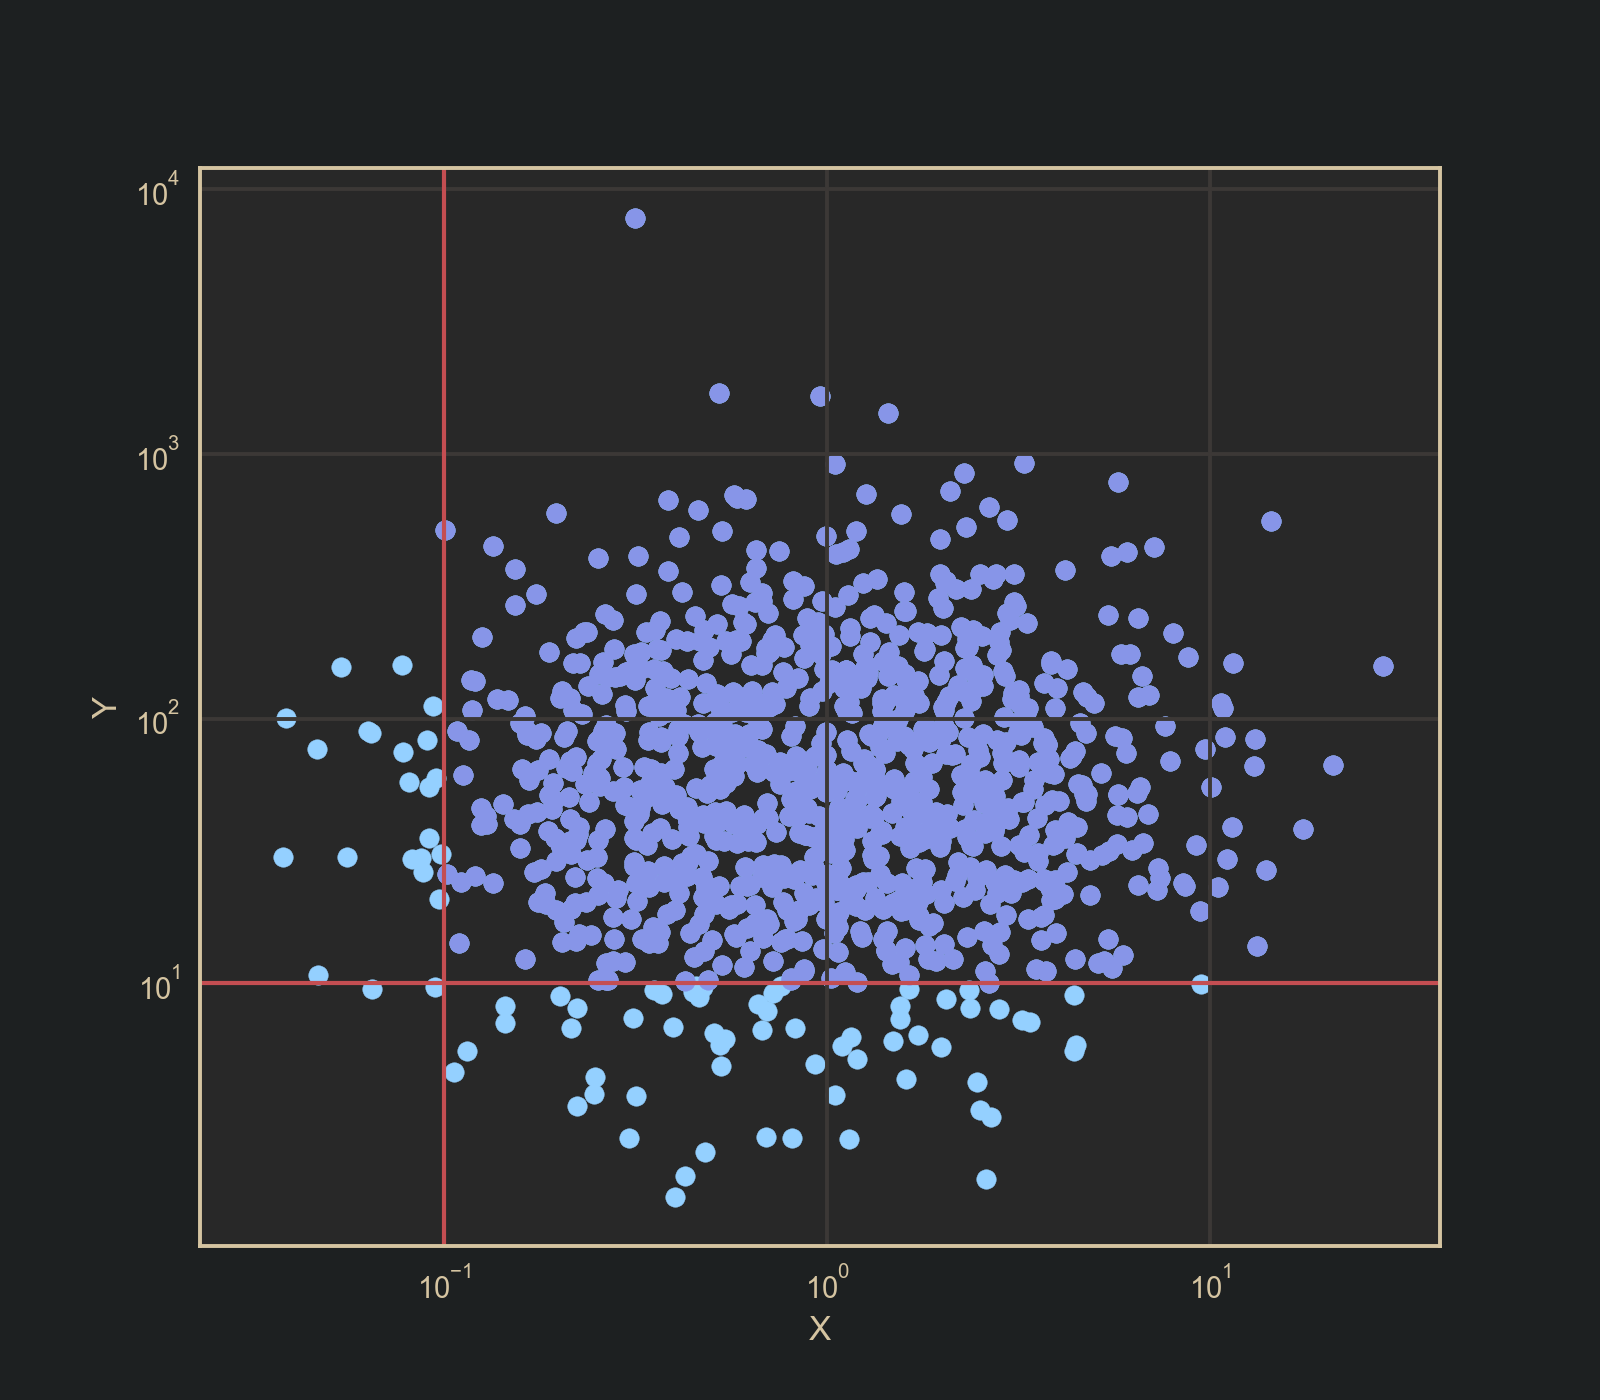

Text(0,0.5,'Y')

In [9]:
fig, ax = plt.subplots()


ax.scatter(xs_obs_all,ys_obs_all)


ax.scatter(xs_obs,ys_obs)



ax.axvline(xth,color='r')
ax.axhline(yth,color='r')

ax.set_yscale('log')

ax.set_xscale('log')

ax.set_xlabel('X')
ax.set_ylabel('Y')

In [5]:
len(xs_all)

161

In [15]:
model = pystan.StanModel(file='gaussian.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_8c8bbe711d906b9cb421910a2234760a NOW.


In [16]:
fit = model.sampling(
    data={'Nobs': len(xs_obs),
          'xobs': xs_obs,
          'sigma_obs': sigma_obs, 
          'xth': xth, 
          'yobs': ys_obs,
          'yth': yth, 
          
          
          'NNobs_max': 300},
    iter=32000/2,
    thin=16/2)

In [20]:
xs_all

array([0.67065221, 3.33779674, 0.71573375, 5.12773945, 1.7193715 ,
       3.0394453 , 0.81348176, 1.2957729 , 1.81708095, 0.34710955,
       4.51008634, 1.11249612, 0.86918884, 5.58185617, 1.16671355,
       1.41906421, 0.45093681, 0.87397352, 2.08271561, 0.78356934,
       0.75142238, 0.23236598, 0.41070262, 0.57516849, 0.26637152,
       0.91118983, 1.35614421, 0.52235307, 0.94370718, 0.74745024,
       1.15305564, 0.12237546, 2.47262411, 0.94935904, 2.30169613,
       0.68766367, 0.6222737 , 2.63583624, 1.09847253, 0.67734061,
       0.57386977, 2.0671071 , 0.82799311, 0.88257775, 1.25517215,
       1.28748112, 0.11221687, 0.41726105, 1.07091191, 3.41872119,
       0.36938581, 0.39991647, 2.43980464, 2.55828195, 1.01712599,
       2.10812626, 0.44864888, 0.20699378, 0.47941556, 0.6982303 ,
       0.14072405, 1.25079375, 0.40215272, 0.4072817 , 0.6488539 ,
       0.09820023, 1.46788717, 1.40985293, 2.11734504, 0.35940177,
       1.78879646, 2.42533799, 0.72611964, 0.38252737, 0.92491

In [23]:
chain = fit.extract(permuted=True)

<IPython.core.display.Javascript object>


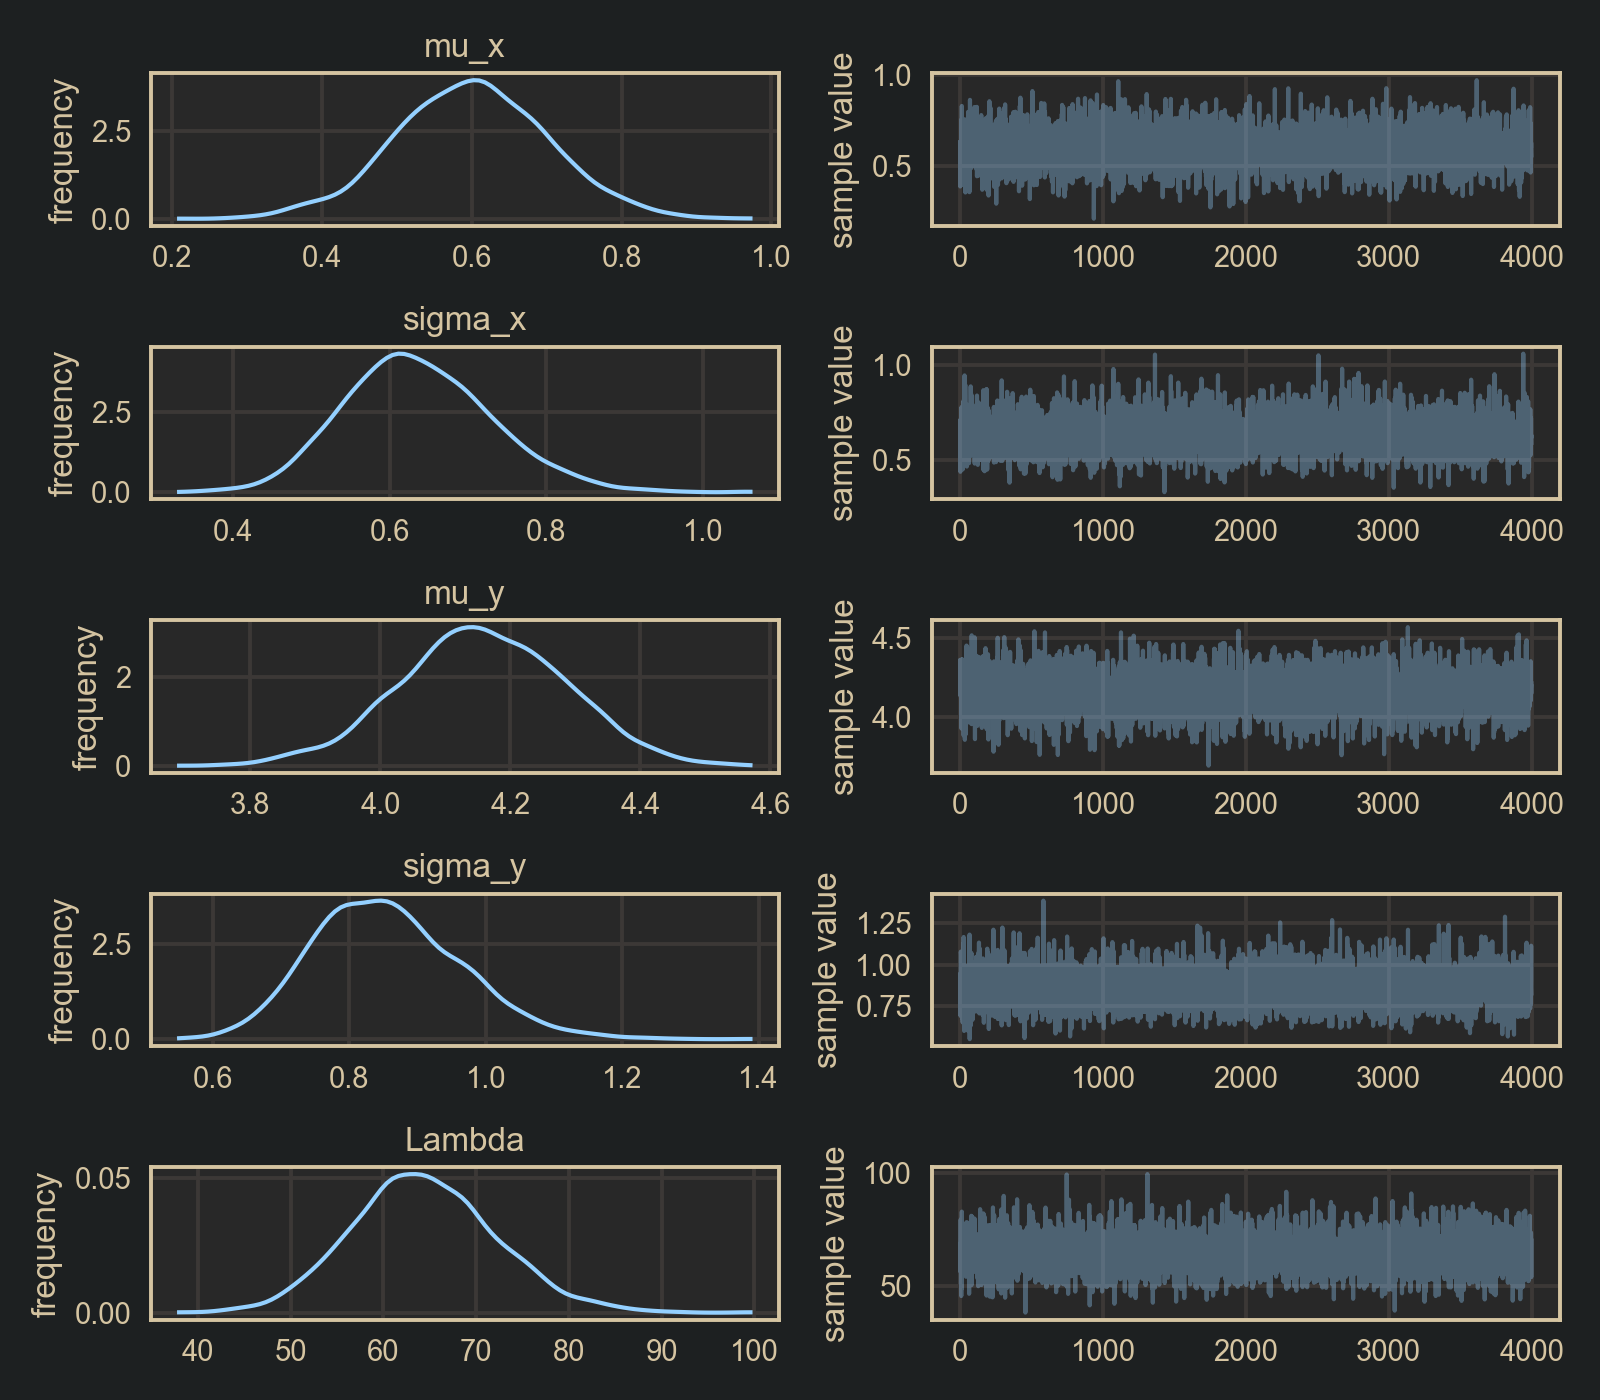

In [17]:
fit.plot(['mu_x', 'sigma_x','mu_y','sigma_y', 'Lambda']);
plt.tight_layout()

And now a comparison of the 1D marginals of the population-level parameters among the three different methods, plus truth:

<IPython.core.display.Javascript object>


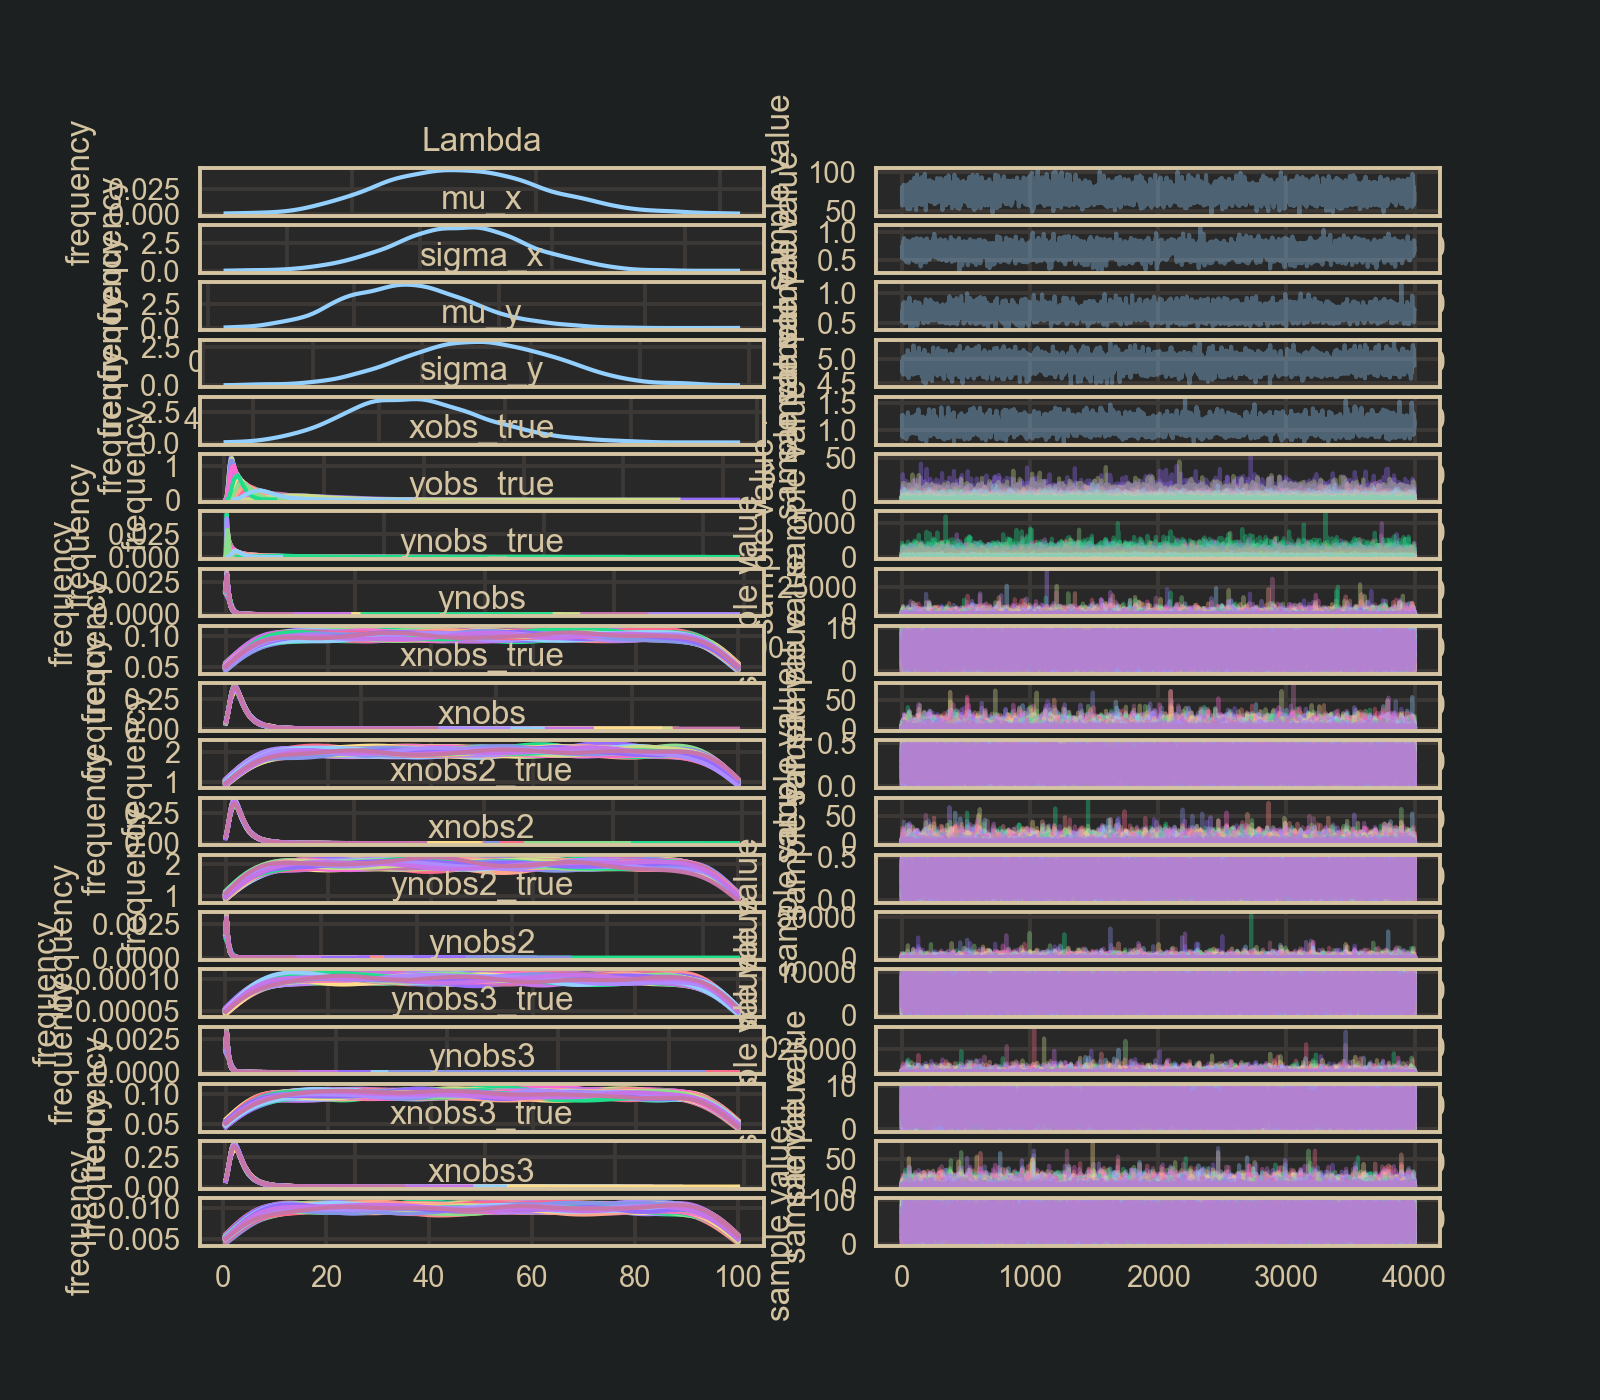

In [15]:
fit.plot();